# Libreries

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from zipfile import ZipFile
import random

# Data

In [2]:
data = pd.DataFrame({"A":[14,986],
                     "B":[8,992],
                     "C":[12,988],
                    "result":["Click","No click"]})

In [3]:
data.set_index("result", inplace=True)

In [4]:
data

,A,B,C
result,,,
Click,14,8,12
No click,986,992,988


# A resampling approach

In [5]:
box = [1] * 34 
box.extend([0] * 2966) 
random.shuffle(box)

In [6]:
def chi2(observed, expected): 
    pearson_residuals = [] 
    for row, expect in zip(observed, expected): 
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in row])
    # return sum of squares 
    return np.sum(pearson_residuals)

In [7]:
data.values

array([[ 14,   8,  12],
       [986, 992, 988]], dtype=int64)

In [8]:
expected_clicks = 34 / 3 
expected_noclicks = 1000 - expected_clicks 
expected = [34 / 3, 1000 - 34 / 3] 

chi2observed = chi2(data.values, expected)

In [9]:
chi2observed

1.6659394708658917

In [10]:
def perm_fun(box): 
    sample_clicks = [sum(random.sample(box, 1000)),  # A
                     sum(random.sample(box, 1000)),  # B
                     sum(random.sample(box, 1000))]  # C
    sample_noclicks = [1000 - n for n in sample_clicks] 
    return chi2([sample_clicks, sample_noclicks], expected)

In [11]:
perm_chi2 = [perm_fun(box) for _ in range(2000)] 
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2) 
print(f'Observed chi2: {chi2observed:.4f}') 
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4875


How often does the resampled sum of squared deviations exceed the observed? That’s the p-value

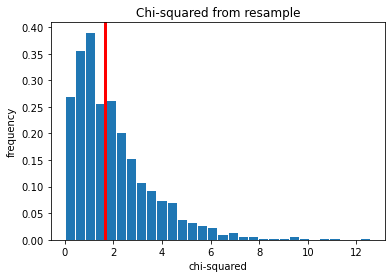

In [13]:
plt.hist(perm_chi2, bins=30,rwidth=0.9, density=True)
plt.axvline(x=chi2observed, color='red', lw=3)
plt.xlabel("chi-squared")
plt.ylabel("frequency")
plt.title("Chi-squared from resample")
plt.show()

$48.2\%$ of the time, the chi-squeared from resample exceed the chi-squared from resample.

# Statistical Theory

In [16]:
from scipy.stats import chi2_contingency

In [18]:
chisq, pvalue, df, expected = chi2_contingency(data)

In [19]:
print(f'Observed chi2: {chi2observed:.4f}') 
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348
